C:\Users\Minseok\AppData\Local\Temp\ipykernel_17100\3504233858.py:94: UserWarning: frames=<generator object radix_sort at 0x00000232CF5F25E0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(


C:\Users\Minseok\anaconda3\Lib\site-packages\matplotlib\animation.py:1719: UserWarning: Can not start iterating the frames for the initial draw. This can be caused by passing in a 0 length sequence for *frames*.

If you passed *frames* as a generator it may be exhausted due to a previous display or save.
  warnings.warn(


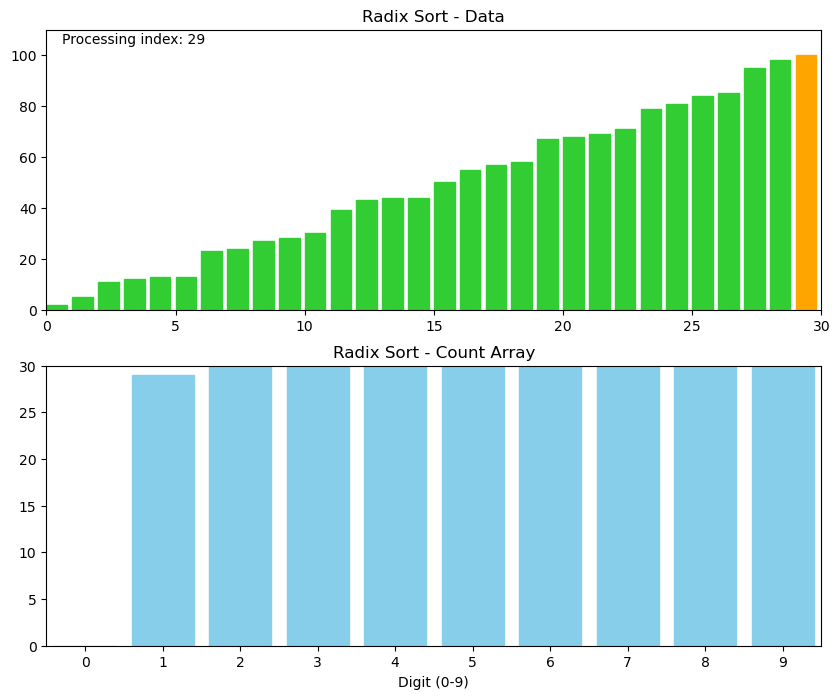

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from IPython.display import HTML

# 무작위 데이터 생성
def generate_data(n=30, max_val=100):
    return [random.randint(1, max_val) for _ in range(n)]

# radix Sort 애니메이션용 generator
# 각 자릿수에 대해 Counting Sort를 수행하는 함수
def counting_sort_for_radix(data, exp):
    n = len(data)  # 입력 데이터의 길이
    output = [0] * n  # 정렬된 결과를 저장할 배열 (초기화)
    count = [0] * 10  # 자릿수 값(0~9)의 빈도를 저장하는 카운트 배열 (초기화)

    # Counting 배열 업데이트: 데이터에서 현재 자릿수 값의 빈도 계산
    for i in range(n):
        index = (data[i] // exp) % 10  # 현재 자릿수 값 계산 (exp 기준)
        count[index] += 1  # 해당 자릿수 값의 빈도를 증가
        yield data, count, i, -1  

    # 누적 합 계산
    for i in range(1, 10):
        count[i] += count[i - 1]  # 누적 합 계산
       
    # 입력 데이터를 역순으로 읽으며 출력 배열에 값 배치
    i = n - 1
    while i >= 0:
        index = (data[i] // exp) % 10  # 현재 자릿수 값 계산 (exp 기준)
        output[count[index] - 1] = data[i]  # 해당 값의 올바른 위치 지정
        count[index] -= 1  # 카운트 배열 값 감소
        yield data, count, i, -1  
        i -= 1  

    # 정렬된 데이터를 원래 배열로 복사
    for i in range(n):
        data[i] = output[i]  # 결과를 원래 배열에 복사
        yield data, count, i, -1 

# Radix Sort 함수: 자릿수별로 Counting Sort를 호출
def radix_sort(data):
    max_val = max(data)  # 입력 데이터에서 가장 큰 값을 찾음
    exp = 1  # 초기 자릿수(일의 자리) 기준값 설정
    while max_val // exp > 0:  # 가장 큰 값의 자릿수만큼 반복
        yield from counting_sort_for_radix(data, exp)  # 현재 자릿수에 대해 Counting Sort 수행
        exp *= 10  # 다음 자릿수로 이동 


# 데이터 초기화
data = generate_data()

# 시각화 준비
fig, (ax_data, ax_count) = plt.subplots(2, 1, figsize=(10, 8))
bar_rects = ax_data.bar(range(len(data)), data, align="edge", color="limegreen")
ax_data.set_title("Radix Sort - Data")
ax_data.set_xlim(0, len(data))
ax_data.set_ylim(0, max(data) * 1.1)

bar_count = ax_count.bar(range(10), [0] * 10, align="center", color="skyblue")
ax_count.set_title("Radix Sort - Count Array")
ax_count.set_xlim(-0.5, 9.5)
ax_count.set_ylim(0, len(data))
ax_count.set_xticks(range(10))
ax_count.set_xlabel("Digit (0-9)")

text = ax_data.text(0.02, 0.95, "", transform=ax_data.transAxes)

# 업데이트 함수
def update(frame):
    bars, count, i, j = frame
    for rect, val in zip(bar_rects, bars):
        rect.set_height(val)
        rect.set_color("limegreen")

    for rect, val in zip(bar_count, count):
        rect.set_height(val)
        rect.set_color("skyblue")
    
    if i >= 0:
        bar_rects[i].set_color("orange")  # 현재 처리 중인 요소를 강조
    if j >= 0:
        bar_rects[j].set_color("white")  # 비교 중인 요소를 강조

    text.set_text(f"Processing index: {i}")

    # 정렬 완료 상태를 표시
    if sum(count) == 0:
        for rect in bar_rects:
            rect.set_color("cyan")

# 애니메이션 실행
generator = radix_sort(data[:])
ani = animation.FuncAnimation(
    fig, 
    update, 
    frames=generator, 
    interval=200, 
    repeat=False
)

# 애니메이션 출력
HTML(ani.to_html5_video())
